# 04. Amostragem & Inferência Estatística
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 20px; right: 20px; border-radius: 5px;" />

## Sobre a Aula

### Objetivos

O objetivo desta aula é apresentar o conceito e as caracteristicas de cada tipo de amostragem, além dos conceitos de confiabilidade, intervalo de confiança e tamanho de amostra.

### Habilidades a serem desenvolvidas

Ao fim desta aula, o aluno deve saber:

- Compreender a importância da amostragemm para modelos de inferência
- Identificar quando e porque usar cada método de amostragem
- Detectar possíveis casos de viés amostral
- Calcular o tamanho amostral
- Nivel de confiabilidade da amostra coletada

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t as t_student
sns.set()

## 1. Noções Básicas
---

Geralmente quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado. Quando um médico deseja identificar se um paciente está doente, alguns ml de sangue são retirados para análise. Note que, em ambos os casos, não seria conveniente analisar o todo para chegar a uma conclusão satisfatória.  

Em Estátistica, este procedimento de tirar uma parte do todo para validar alguma suposição é chamada de amostragem.  Em outras palavras, o procedimento amostral visa obter informações sobre o todo baseando-se no resultado de uma amostra.



![Amostragem](http://drive.google.com/uc?export=view&id=1h3EUKf74tn3WMFJ17KkqnfrHT6MXmm5j)

### 1.1 Definições

- **População**: ou Universo é o conjunto de todas as unidades elementares de interesse. A população deve ser definida claramente e em termos da informação que se pretende conhecer.

- **Unidade**: trata-se de qualquer elemento da população.

- **Amostra**: uma parte ou subconjunto da população

- **Censo**:  observação de todos os elementos da população.

- **Parâmetro Populacional**: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser qualitativa (gosto musical, opnião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

- **Função Paramétrica Populacional**:  é uma característica numérica da população, ou seja, uma expressão numérica que condensa os valores do vetor de parâmetro populacional. Por exemplo, média, total, proporção, dentre outros.

<br>

**Exemplo 1**: Considere uma população formada por 4 alunos de uma escola. Com as seguintes caracteristicas:


<table>
    <th style="text-align: center; border: 1px solid black">Variável</th>
    <th style="text-align: center; border: 1px solid black" colspan="4">Valores</td>
    <tr style=" border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Aluno</td>
        <td style="text-align: center; border: 1px solid black">1</td>
        <td style="text-align: center; border: 1px solid black">2</td>
        <td style="text-align: center; border: 1px solid black">3</td>
        <td style="text-align: center; border: 1px solid black">4</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Nome</td>
        <td style="text-align: center; border: 1px solid black">Ana</td>
        <td style="text-align: center; border: 1px solid black">João</td>
        <td style="text-align: center; border: 1px solid black">Lucas</td>
        <td style="text-align: center; border: 1px solid black">Francisco</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Idade</td>
        <td style="text-align: center; border: 1px solid black">8</td>
        <td style="text-align: center; border: 1px solid black">7</td>
        <td style="text-align: center; border: 1px solid black">8</td>
        <td style="text-align: center; border: 1px solid black">12</td>
    </tr>
        <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">Sexo</td>
        <td style="text-align: center; border: 1px solid black">F</td>
        <td style="text-align: center; border: 1px solid black">M</td>
        <td style="text-align: center; border: 1px solid black">M</td>
        <td style="text-align: center; border: 1px solid black">M</td>
    </tr>
</table>


Neste exemplo, cada aluno é um elemento da população. Com relação à amostragem os subconjuntos (Ana, João), (Francisco, Ana), (João) são **exemplos de amostra**. **Parâmetros populacionais**: idade = (8,7,8,12) e sexo = (F,M,M,M). Com relação às **funções paramétricas**, poderíamos definir:

- Idade média: fazendo idade = Y:

$$\mu = \overline{Y} = \frac{\sum_{i=1}^{4}Y_i}{4}=\frac{8+7+8+12}{4}=8,75$$

- Idade máxima: max(Y)= max(8,7,8,12) = 12


- Porporção de meninas: sexo = Y = (F,M,M,M)

$$p(F) = \frac{1}{4} = 0,25 $$









### 1.2 Tipos de Amostragem

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental.

### 1.3 Quando utilizar uma amostra?

#### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

#### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

#### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

#### Custos elevados

Quando a população é finita, mas muito numerosa, o custo de um censo pode tornar o processo inviável.

### 1.4. Cuidados que devemos ter durante o processo de Amostragem

> [Problemas de Viés](https://docs.google.com/presentation/d/1CpJG52ltzvgHKZXNj4uHZdmjbxYxZjzE2hGgUGXH4Ns/edit?usp=sharing)

## Enviar datasets de desbalanceamento de amostras

## 2. Métodos de Amostragem
---

Neste módulo abordaremos apenas os métodos relacionados à amostragem probabilística, com o objetico de obter uma **amostra representativa**. Uma amostra é considerada representativa quando consegue **refletir as caracteristicas da população**.

### 2.1 Amostra Aleatória Simples

Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma AAS com preposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.
 
 
Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado

**Exemplo 1**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, sem reposição.

#### Com uma lista

In [2]:
alunos = [f'Aluno {i}' for i in range(1, 21)]

alunos

['Aluno 1',
 'Aluno 2',
 'Aluno 3',
 'Aluno 4',
 'Aluno 5',
 'Aluno 6',
 'Aluno 7',
 'Aluno 8',
 'Aluno 9',
 'Aluno 10',
 'Aluno 11',
 'Aluno 12',
 'Aluno 13',
 'Aluno 14',
 'Aluno 15',
 'Aluno 16',
 'Aluno 17',
 'Aluno 18',
 'Aluno 19',
 'Aluno 20']

In [3]:
from random import sample, choice

In [4]:
sample(alunos, k=5, counts=[10] * 20)

['Aluno 17', 'Aluno 15', 'Aluno 15', 'Aluno 20', 'Aluno 17']

In [5]:
choice(alunos)

'Aluno 5'

#### Com um array

In [6]:
alunos_array = np.array(alunos)

In [7]:
alunos_array

array(['Aluno 1', 'Aluno 2', 'Aluno 3', 'Aluno 4', 'Aluno 5', 'Aluno 6',
       'Aluno 7', 'Aluno 8', 'Aluno 9', 'Aluno 10', 'Aluno 11',
       'Aluno 12', 'Aluno 13', 'Aluno 14', 'Aluno 15', 'Aluno 16',
       'Aluno 17', 'Aluno 18', 'Aluno 19', 'Aluno 20'], dtype='<U8')

In [8]:
np.random.random_sample(10)

array([0.32347808, 0.93085202, 0.44669838, 0.73340654, 0.43520081,
       0.75388084, 0.77726992, 0.7069832 , 0.82163624, 0.06920241])

In [9]:
np.random.choice(alunos_array, size=5, replace=False)

array(['Aluno 17', 'Aluno 8', 'Aluno 6', 'Aluno 14', 'Aluno 12'],
      dtype='<U8')

#### Com um dataset

In [10]:
df = sns.load_dataset('tips')

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.shape

(244, 7)

In [13]:
df.sample(20, random_state=10)

,total_bill,tip,sex,smoker,day,time,size
162,16.21,2.00,Female,No,Sun,Dinner,3
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
69,15.01,2.09,Male,Yes,Sat,Dinner,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
55,19.49,3.51,Male,No,Sun,Dinner,2
211,25.89,5.16,Male,Yes,Sat,Dinner,4
46,22.23,5.00,Male,No,Sun,Dinner,2
35,24.06,3.60,Male,No,Sat,Dinner,3


In [14]:
df.sample(frac=0.1)

,total_bill,tip,sex,smoker,day,time,size
222,8.58,1.92,Male,Yes,Fri,Lunch,1
203,16.40,2.50,Female,Yes,Thur,Lunch,2
216,28.15,3.00,Male,Yes,Sat,Dinner,5
100,11.35,2.50,Female,Yes,Fri,Dinner,2
123,15.95,2.00,Male,No,Thur,Lunch,2
142,41.19,5.00,Male,No,Thur,Lunch,5
171,15.81,3.16,Male,Yes,Sat,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
238,35.83,4.67,Female,No,Sat,Dinner,3
231,15.69,3.00,Male,Yes,Sat,Dinner,3


In [15]:
df.sample(frac=0.1, replace=True).duplicated()

15     False
217    False
45     False
76     False
132    False
32     False
208    False
62     False
189    False
124    False
161    False
186    False
135    False
37     False
34     False
35     False
210    False
7      False
62      True
189     True
56     False
21     False
9      False
58     False
dtype: bool

In [16]:
[i for i in range(df.shape[0])] # 0 a 243

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [17]:
df.sample(frac=0.1, weights=[i for i in range(df.shape[0])])

,total_bill,tip,sex,smoker,day,time,size
203,16.40,2.50,Female,Yes,Thur,Lunch,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2
198,13.00,2.00,Female,Yes,Thur,Lunch,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
88,24.71,5.85,Male,No,Thur,Lunch,2
208,24.27,2.03,Male,Yes,Sat,Dinner,2
137,14.15,2.00,Female,No,Thur,Lunch,2
66,16.45,2.47,Female,No,Sat,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4
236,12.60,1.00,Male,Yes,Sat,Dinner,2


In [18]:
df.sample(20, ignore_index=True)

,total_bill,tip,sex,smoker,day,time,size
0,19.65,3.00,Female,No,Sat,Dinner,2
1,19.44,3.00,Male,Yes,Thur,Lunch,2
2,17.82,1.75,Male,No,Sat,Dinner,2
3,11.61,3.39,Male,No,Sat,Dinner,2
4,18.26,3.25,Female,No,Thur,Lunch,2
5,24.08,2.92,Female,No,Thur,Lunch,4
6,22.49,3.50,Male,No,Fri,Dinner,2
7,17.92,4.08,Male,No,Sat,Dinner,2
8,18.78,3.00,Female,No,Thur,Dinner,2
9,14.07,2.50,Male,No,Sun,Dinner,2


### 2.2 Amostra Sistemática

Usada quando os elementos população estão ordenados (população de lista telefônica, casas em uma rua). 

Considere uma população de tamanho $N$ e que se queira uma amostra de tamanho $n$. O processo de amostragem deste método consiste em:

- Dividir o tamanho populacional em $K$ partes:
$$ k = \frac{N}{n} $$

- Definir a posição de início da amostragem (que também será o primeiro elemento da amostra). Para tal fim, é sorteado $i$ com o uso da amostra aleatória simples no intervalo, em que  $i \in [1, k]$


- A partir do elemento selecionado aleatoriamente, é realizada sucessão aritimética para selecionar os $n-1$ indivíduos restantes
$$i, i + k, i + 2k, i + 3k, ...., i + (n-1)k$$



Exemplo de algoritmo para amostragem sistemática:

20 elementos na população
5 elementos da amostra

passo = 20 / 5 = 4

In [19]:
df.shape

(244, 7)

In [20]:
df.shape[0] / 4

61.0

In [21]:
df.iloc[::4, :]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
224,13.42,1.58,Male,Yes,Fri,Lunch,2
228,13.28,2.72,Male,No,Sat,Dinner,2
232,11.61,3.39,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2


In [22]:
df.iloc[[0, 10, 20], :]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
20,17.92,4.08,Male,No,Sat,Dinner,2


### 2.3 Amostra Estratificada 

Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. São exemplos de estrato o gênero, faixa etária, região geográfica, profiissão. No geral, é usada quando a população é heterogênea sob a ótica das características analisadas. Procedimento de amostragem:

- Dividir as $N$ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo 3**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola). Agora considere que a proporção de cada estrato seja: 60% alunos, 30% professores e 10% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,6 \times n$ de alunos, $0,3\times n$ de professores e $0,10\times n$ de servidores.

![estratos](images/estratificada.png)


In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
day_percent= df.day.value_counts(normalize=True)
day_percent

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [30]:
df.shape

(244, 7)

In [31]:
df.sample(50).day.value_counts(True)

Sat     0.40
Sun     0.36
Thur    0.20
Fri     0.04
Name: day, dtype: float64

In [38]:
df_sat = df.query('day == "Sat"').sample(n=round(day_percent['Sat'] * 50))
df_sun = df.query('day == "Sun"').sample(n=round(day_percent['Sun'] * 50))
df_thur = df.query('day == "Thur"').sample(n=round(day_percent['Thur'] * 50))
df_fri = df.query('day == "Fri"').sample(n=round(day_percent['Fri'] * 50))

In [45]:
day_percent

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [44]:
pd.concat([df_sat, df_sun, df_thur, df_fri]).day.value_counts(normalize=True)

Sat     0.352941
Sun     0.313725
Thur    0.254902
Fri     0.078431
Name: day, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()

### 2.4 Amostra por conglomerados

A população é dividida em subpopulações (conglomerados) heterogêneas distintas (quarteirões, residências, famílias, bairros, etc.). Alguns dos conglomerados são selecionados segundo amostra aleatória simples e **todos os elementos** nos conglomerados selecionados são observados. Note que amostragem é feita sobre os conglomerados, e não mais sobre os indivíduos da população. Este procedimento amostral é adequado quando é possível dividir a população em um grande número de pequenas subpopulações.

Geralmente este método é usado quando os sistemas de referência da população não são adequados e o custo para atualização é alto, ou quando identificar os elementos da população em campo é cara e consome muito tempo.

**Exemplo 4**: Suponha que o objetivo de uma pesquisa seja determinar a renda média familiar de moradores de uma cidade. Dificilmente dispõe-se de uma lista de famílias, a unidade elementar da população de interesse. Pode-se usar como sistema de referência a lista de setores censitários do IBGE. Neste caso, os setores censitários seriam os conglomerados.

![cong](images/conglomerado.png)

## 3. Tamanho Amostral
---

Ao se realizar uma amostra para inferir uma determinada função paramétrica (média, máximo ou outra função de um parâmetro), há um erro associado ao planejamento amostral. A medida que o tamanho da amostra aumenta, o erro do estimador decresce. Vale ressaltar que uma amostra muito grande pode implicar em custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva. Deste modo, o ponto chave de um levantamento amostral é determinar o tamanho da amostra. 


**Exemplo 5**: Considere o exemplo em que se queira estimar a média da variável "Petal length" (base ires). O gráfico mostra que a relação entre tamanho da amostra e erro amostral não é linear, corroborando o que será discutido nesta seção.

In [47]:
iris = sns.load_dataset('iris')

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
iris.shape

(150, 5)

In [52]:
pop_mean = iris['petal_length'].mean() # Média da população
pop_mean

3.7580000000000005

In [57]:
iris['petal_length'].sample(2, random_state=101).mean()

1.35

In [54]:
iris['petal_length'].sample(3, random_state=101).mean()

1.4333333333333336

In [55]:
iris['petal_length'].sample(5, random_state=101).mean()

2.96

In [59]:
sample_error = [] # [[2, erro_2], [3, erro_3], ...]

for n in range(2, iris.shape[0] + 1):
    # Obtendo a amostra
    sample = iris['petal_length'].sample(n, random_state=101)
    
    sample_mean = sample.mean()
    error = abs(sample_mean - pop_mean)
    
    sample_error.append([n, error])

In [60]:
df_n_error = pd.DataFrame(sample_error, columns=['n', 'error'])

In [62]:
df_n_error

,n,error
0,2,2.408000e+00
1,3,2.324667e+00
2,4,1.233000e+00
3,5,7.980000e-01
4,6,4.746667e-01
...,...,...
144,146,5.013699e-03
145,147,1.206803e-02
146,148,1.159459e-02
147,149,2.966443e-03


In [66]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = 'plotly_dark'

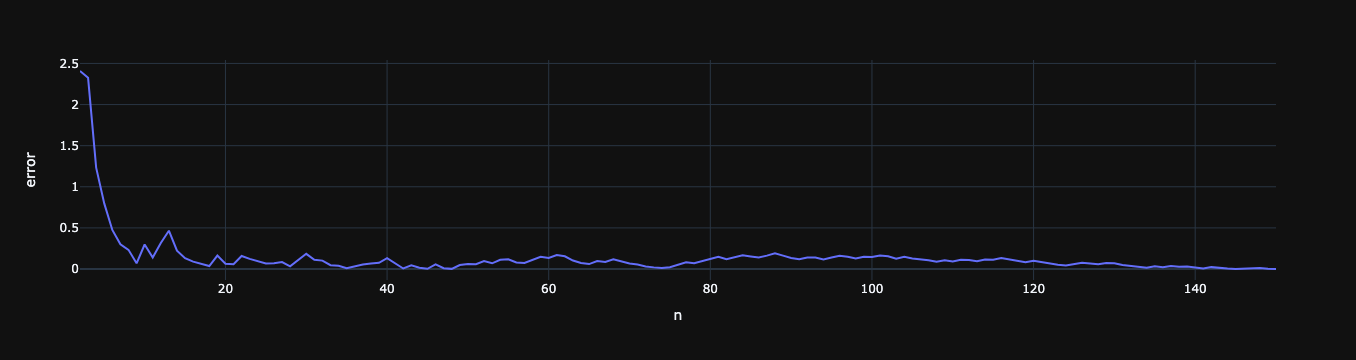

In [67]:
px.line(data_frame=df_n_error, x='n', y='error')

### 3.1 Teorema Central do Limite (TCL)

Seja uma amostra aleatória ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. A medida que $n$ cresce, a distribuição de probabilidade da média amostral, $\overline{X}$, se aproxima de uma Normal com média $\mu$ e desvio padrão $\frac{\sigma}{\sqrt{n}}$. Isto é $\overline{X} \sim N (\mu, \sigma^2/n)$. Se a transformação a baixo for realizada, então $Z \sim N (0,1)$.

$$Z = \frac{\overline{X} -\mu}{\sigma/\sqrt{n}} $$



> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

### Entendendo o Teorema do Limite Central

In [68]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv')

In [69]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<AxesSubplot:xlabel='Idade', ylabel='Count'>

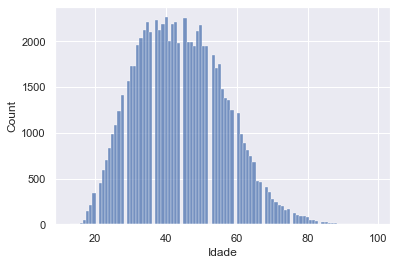

In [72]:
sns.histplot(df.Idade)

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [77]:
df.shape

(76840, 7)

In [78]:
n = 2000         # tamanho da amostra
n_samples = 1500 # número de amostragens

In [81]:
df.Idade.sample(n, ignore_index=True) # Series

0       32
1       47
2       50
3       60
4       24
        ..
1995    48
1996    41
1997    62
1998    42
1999    28
Name: Idade, Length: 2000, dtype: int64

In [82]:
amostragens = pd.DataFrame()

for i in range(n_samples):
    amostra_idade = df.Idade.sample(n, ignore_index=True) # Series
    
    amostragens[f'Amostra {i + 1}'] = amostra_idade

/var/folders/9p/770yx95j1n7187wfwtr4x16h0000gn/T/ipykernel_4778/2417622662.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [83]:
amostragens

,Amostra 1,Amostra 2,Amostra 3,Amostra 4,Amostra 5,Amostra 6,Amostra 7,Amostra 8,Amostra 9,Amostra 10,...,Amostra 1491,Amostra 1492,Amostra 1493,Amostra 1494,Amostra 1495,Amostra 1496,Amostra 1497,Amostra 1498,Amostra 1499,Amostra 1500
0,63,44,50,42,32,63,41,48,53,43,...,51,29,36,55,35,33,55,54,36,54
1,51,68,46,46,51,64,54,48,45,40,...,44,40,54,55,50,50,45,45,48,54
2,25,21,48,52,66,36,28,42,33,34,...,54,35,35,48,35,60,33,31,38,33
3,45,28,37,47,54,35,57,57,19,36,...,77,59,43,40,50,57,38,55,59,42
4,25,50,48,24,66,33,42,77,38,39,...,56,34,41,47,21,67,42,59,36,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,36,75,26,41,53,39,44,66,56,23,...,66,29,22,21,48,64,38,43,55,74
1996,26,58,43,60,29,56,48,42,32,29,...,40,42,65,53,46,25,33,47,43,62
1997,55,48,51,34,48,39,34,37,51,43,...,30,53,40,31,58,54,51,35,42,59
1998,27,51,29,24,26,51,63,20,27,33,...,41,46,54,76,30,34,55,45,43,70


In [84]:
amostragens.mean()

Amostra 1       44.2925
Amostra 2       44.5975
Amostra 3       44.3720
Amostra 4       44.3745
Amostra 5       44.2490
                 ...   
Amostra 1496    43.4585
Amostra 1497    44.2695
Amostra 1498    44.0450
Amostra 1499    44.0140
Amostra 1500    44.0540
Length: 1500, dtype: float64

<AxesSubplot:ylabel='Count'>

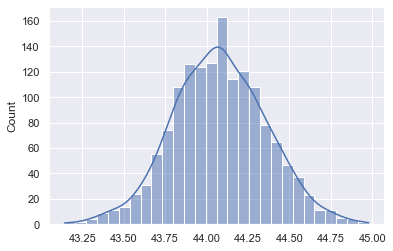

In [87]:
sns.histplot(amostragens.mean(), kde=True)

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [89]:
amostragens.mean().mean()

44.077289666666665

In [90]:
df.Idade.mean()

44.07142113482561

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$  


In [94]:
amostragens.mean().std() # Desvio padrão das médias amostrais

0.2821572328730868

In [95]:
df.Idade.std() # Desvio padrão populacional

12.48058346535974

In [96]:
df.Idade.std() / np.sqrt(n)

0.27907433027404266

### Utilizando dados da Renda

<AxesSubplot:xlabel='Renda', ylabel='Count'>

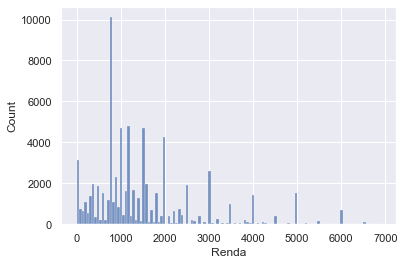

In [98]:
sns.histplot(df.query('Renda < 7000').Renda)

In [78]:
n = 2000         # tamanho da amostra
n_samples = 1500 # número de amostragens

In [99]:
df.Renda.sample(n, ignore_index=True) # Series

0        2000
1        1400
2        1700
3        2600
4         788
        ...  
1995     3500
1996     2000
1997    10000
1998     2000
1999    20000
Name: Renda, Length: 2000, dtype: int64

In [100]:
amostragens = pd.DataFrame()

for i in range(n_samples):
    amostra_idade = df.Renda.sample(n, ignore_index=True) # Series
    
    amostragens[f'Amostra {i + 1}'] = amostra_idade

/var/folders/9p/770yx95j1n7187wfwtr4x16h0000gn/T/ipykernel_4778/1387126079.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [101]:
amostragens

,Amostra 1,Amostra 2,Amostra 3,Amostra 4,Amostra 5,Amostra 6,Amostra 7,Amostra 8,Amostra 9,Amostra 10,...,Amostra 1491,Amostra 1492,Amostra 1493,Amostra 1494,Amostra 1495,Amostra 1496,Amostra 1497,Amostra 1498,Amostra 1499,Amostra 1500
0,900,1500,4500,2500,788,5500,1000,1300,2100,1100,...,0,1800,1900,2050,300,788,788,2000,0,1200
1,1700,700,4500,3000,300,1200,910,1000,1576,500,...,1700,1000,2000,3000,3000,400,800,600,850,0
2,788,1500,700,2000,2000,8000,3000,2500,1500,1000,...,1200,12000,0,4000,2000,1576,500,3000,1000,1576
3,1200,2300,3500,1500,2600,2000,788,4800,2000,788,...,1000,50,1650,1100,200,1600,1056,788,300,1500
4,3500,788,1200,2000,1200,789,1500,100,1200,2365,...,400,1800,600,788,700,560,788,1900,350,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1720,985,2000,1000,2000,200,160,788,250,1200,...,160,1300,0,600,6500,200,16000,1200,3200,7000
1996,1850,788,600,788,7000,968,788,0,800,3000,...,400,2000,788,1200,3500,250,1000,789,900,80
1997,100,100,2200,800,788,788,1430,2800,0,788,...,788,150,600,789,1300,3500,4000,5200,1558,450
1998,4160,700,200,980,2500,1000,1200,788,1250,970,...,1500,1800,1200,1500,1000,1500,788,200,3000,2500


In [102]:
amostragens.mean()

Amostra 1       1944.0230
Amostra 2       1925.8860
Amostra 3       2060.1360
Amostra 4       2029.2530
Amostra 5       1888.2385
                  ...    
Amostra 1496    1971.5585
Amostra 1497    1933.2700
Amostra 1498    1832.3180
Amostra 1499    1997.1295
Amostra 1500    1971.7885
Length: 1500, dtype: float64

<AxesSubplot:ylabel='Count'>

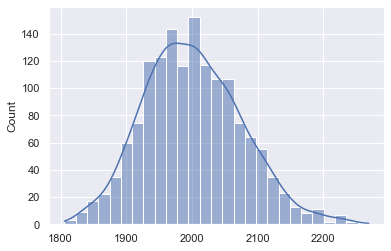

In [103]:
sns.histplot(amostragens.mean(), kde=True)

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [104]:
amostragens.mean().mean()

2001.096894

In [106]:
df.Renda.mean()

2000.3831988547631

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [107]:
amostragens.mean().std() # Desvio padrão das médias amostrais

74.24932458139688

In [109]:
df.Renda.std() # Desvio padrão populacional

3323.3877303464037

In [110]:
df.Renda.std() / np.sqrt(n)

74.313208806433

## 3.2. Níveis de confiança e significância
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

In [111]:
from scipy.stats import norm

In [ ]:
norm.sf() # Contrário do cdf (acumulada à direita)

## 3.3 Erro inferencial
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## 4.4 Intervalos de confiança
***

### Intervalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}} = \bar{x} \pm e$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z_{\alpha/2}\frac{s}{\sqrt{n}}$$

### Exemplo

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatória de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

#### Média amostral

In [116]:
media_amostral = 5050 # gramas

#### Nível de significância ($\alpha$)

In [112]:
significancia = 0.05

#### Nível de confiança ($1 - \alpha$)

In [113]:
confianca = 1 - significancia

In [115]:
confianca

0.95

In [117]:
sigma = 150 # gramas

In [118]:
n = 20 # tamanho da amostra (número de sacos)

#### Obtendo $z$

In [23]:
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada.iloc[15:22]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.50,0.9332,0.9345,0.9357,0.9370,0.9382,0.9394,0.9406,0.9418,0.9429,0.9441
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857


In [119]:
z_alpha_2 = 1.96

### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [120]:
norm.cdf(1)

0.8413447460685429

In [121]:
norm.ppf(0.8413447460685429)

1.0

In [126]:
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2)) # Probabilidade acumulada: 97.5%

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

Obtendo $\sigma_\bar{x}$

In [125]:
sigma / np.sqrt(n)

33.54101966249684

### Obtendo $e$

In [127]:
erro = z_alpha_2 * (sigma / np.sqrt(n))

In [129]:
erro # gramas

65.73919054324361

### Solução 1 - Calculando o intervalo de confiança para a média

In [130]:
(media_amostral - erro, media_amostral + erro)

(4984.260809456757, 5115.739190543243)

### Solução 2 - Calculando o intervalo de confiança para a média

In [131]:
norm.interval(confianca, loc=media_amostral, scale=sigma / np.sqrt(n))

(4984.260809456757, 5115.739190543243)

### 3.2 Cálculo do tamanho amostral baseado na estimativa da média populacional

#### 3.2.1 População Infinita

Uma população é considerada infinita quando seu tamanho é muito grande.

Ao realizar o cálculo do tamanho da amostra $n$, deve-se levar em consideração o erro $\epsilon$ máximo que deseja-se assumir (ao estimar a função parâmetrica) e o nível de confiança do resultado (probabilidade). Sendo assim, o problema consiste em determinar $n$ de forma que:

$$P(\mid \overline{X} - \mu \mid \leq \epsilon) \simeq 1 - \alpha $$

Mas pelo Teorema Central do Limite, a equação acima pode ser reescrita como:

$$P \left(\mid \overline{X} - \mu \mid \leq z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right) \simeq 1 - \alpha $$

Sendo assim, dados um erro máximo e nível de confiança, calcular o tamanho amostral consiste em:

$$ z_{\alpha/2}\frac{\sigma}{\sqrt{n}} = \epsilon  \Longrightarrow n = \left(\frac{z_{\alpha/2}\sigma}{\epsilon }\right) ^2 $$

#### 3.2.2 População Finita

No caso em que o tamanho populacional não é tão grande, a consideramos finita. **Caso a amostra tenha um tamanho $n$ maior ou igual a 5% do tamanho da população $N$, considera-se que a população é finita**. Neste caso, aplica-se um fator de correção à fórmula vista anteriormente:

$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

#### 3.2.3 Principais níveis de confiança usados

<table>
    <th style="text-align: center; border: 1px solid black">Grau de Confiança</th>
    <th style="text-align: center; border: 1px solid black">$\alpha$</th>
    <th style="text-align: center; border: 1px solid black">$z_{\alpha/2}$</th>
    <tr style=" border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">90%</td>
        <td style="text-align: center; border: 1px solid black">0,10</td>
        <td style="text-align: center; border: 1px solid black">1,645</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">95%</td>
        <td style="text-align: center; border: 1px solid black">0,05</td>
        <td style="text-align: center; border: 1px solid black">1,96</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">99%</td>
        <td style="text-align: center; border: 1px solid black">0,01</td>
        <td style="text-align: center; border: 1px solid black">2,575</td>
    </tr>
</table>


#### 3.2.4 Variância populacional desconhecida

No caso em que a variância populacional é desconhecida, pode-se realizar uma amostragem aleatória preliminar (ao menos 30 elementos) para estimar a variancia amostral e usa-la na equaçao acima.

$$\widehat{\sigma^2} = s^2 = \frac{\sum_{i=1}^{n}(x_i -\overline{X})^2}{N-1} $$

### Exemplo 1

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [133]:
sigma = df.Renda.std()

In [134]:
erro_maximo = 100

In [135]:
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2))
z_alpha_2

1.959963984540054

In [136]:
n_minimo = (z_alpha_2 * sigma / erro_maximo)**2

In [139]:
n = round(np.ceil(n_minimo))

In [140]:
n

4243

In [7]:
n = np.array([19.8, 18.5, 17.6, 16.7, 15.8, 15.4, 14.1, 13.6, 11.9, 11.4, 11.4, 8.8, 7.5, 15.4, 15.4, 19.5, 14.9, 12.7, 11.9, 11.4, 10.1, 7.9])

In [15]:
n.std()

3.4718734076399858

#### Tirando a "prova real"

In [141]:
erro = z_alpha_2 * sigma / np.sqrt(n)

In [142]:
erro

99.99829317577067

#### Amostra do DataFrame (Renda)

In [145]:
sample = df.Renda.sample(n, random_state=101)

In [146]:
sample.mean()

2028.373792128211

In [147]:
df.Renda.mean()

2000.3831988547631

### Exemplo 2

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **500 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

# <font color=red>PARA FAZER</font>

### Exemplo Prático

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R\\$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R\\$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R\\$ 1.082,79** e que a **média populacional** é de **R\\$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

## <font color=red>Exercícios</font>
---

### Exercício 01

O valor do gasto médio dos clientes de uma loja de conveniência é de R\\$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

In [12]:
sig = 0.1
conf = 1 - sig
max_error = 0.1 * 45.5
sigma = 15

In [13]:
z_alpha_2 = norm.ppf(conf + sig /2)

In [14]:
n_min = (z_alpha_2 * sigma / max_error)**2

n = int(np.ceil(n_min))

n

30

### Exercício 02

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [32]:
conf = 0.95         # 95%
sig = 1 - conf
max_error = 0.3     # 0,3 kg
s = 0.48            # 480 g

In [33]:
z_alpha_2 = norm.ppf(conf + sig / 2)
z_alpha_2

1.959963984540054

In [34]:
n_min = (z_alpha_2 * s / max_error)**2
n_min

9.834134580976961

In [35]:
n = np.ceil(n_min)
n       # Amostras

10.0

#### Calculando o tamanho da amostra

![](images/normal_t-student.png)

In [ ]:
t_student

---

## Dúvidas

### Lista de Variáveis Aleatórias e Distribuição de Probabilidade

**QUESTÃO 04**

Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, **quantas podemos *esperar*** que tenham dois filhos com olhos azuis?

In [ ]:
- Primeiro experimento: número de filhos com olhos azuis
    - Quantos sucessos? 2
    - Probabilidade de sucesso: 22%
    
- Segundo experimento: número de família com dois filhos de olhos azuis
    - Qual o valor esperado para este experimento?
    - E(X) = n * p